<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/main/aula02b_regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import matplotlib.pyplot as plt

def plotDataset(X, y):
  plt.plot(X[:,0], y, 'o', alpha=0.3)


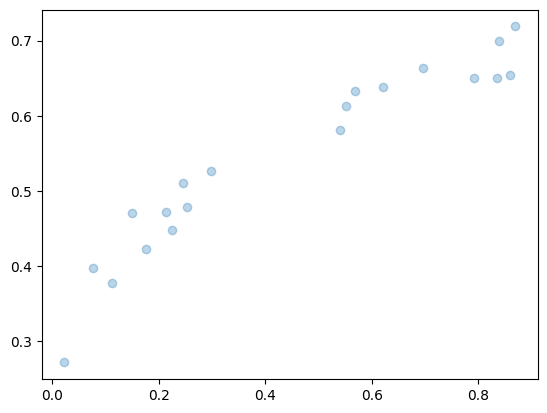

In [51]:
import numpy as np

def criaDatasetRegressão(n=20, slop=0.5, intercept=0.2):
  X = np.random.uniform(size=(n,1))
  AUX = np.random.rand(n,1)-0.5
  y = X**0.4 * slop + intercept + AUX*0.1
  y = y.flatten()
  return X, y

X, y = criaDatasetRegressão()
plotDataset(X, y)

In [62]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import mean_squared_error

def include_bias(X):
  bias = np.ones((X.shape[0],1))
  Xb = np.concatenate((bias, X), axis=1)
  return Xb

class Perceptron(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=1000, learning_rate=0.01):
    self.epochs = range(epochs)
    self.learning_rate = learning_rate

  def fit(self, X, y):
    Xb = include_bias(X)
    #''' Widrow-Hoff
    self.w = np.random.uniform(size=Xb.shape[1])*2-1
    for _ in self.epochs:
        ypred = (Xb @ self.w)
        error = y-ypred
        self.w += Xb.T @ error * self.learning_rate
        cost = sum(error**2)
        if cost == 0:
          break
    return self

  def predict(self, X):
    Xb = include_bias(X)
    return (Xb @ self.w)

model = Perceptron()
model.fit(X, y)
ypred = model.predict(X)
print(model.w)
print(mean_squared_error(y, ypred))


[0.36804307 0.39370972]
0.0014106711088963247


In [63]:
def plotRegressão(slop, intercept=-0.4):
  xs = np.array([0, 1])
  ys = (slop*xs+intercept)
  plt.plot(xs, ys, 'r-')


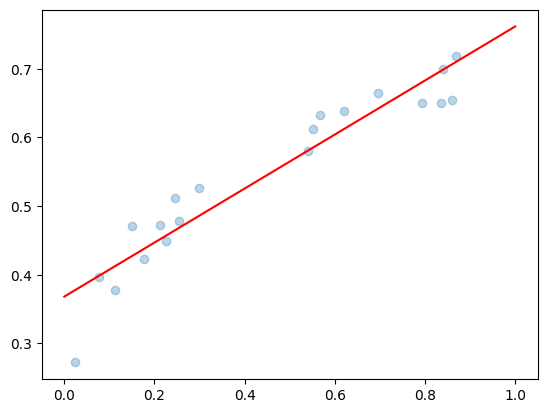

In [64]:
plotDataset(X, y)
plotRegressão(slop=model.w[1], intercept=model.w[0])
plt.show()

0.0017593764532444105


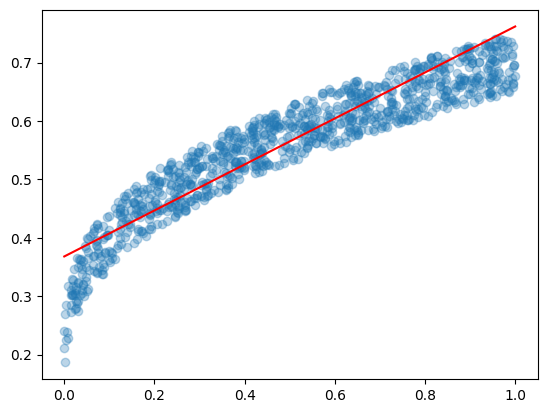

In [66]:
Xtest, ytest = criaDatasetRegressão(n=1000)
ypred = model.predict(Xtest)
print(mean_squared_error(ytest, ypred))
plotDataset(Xtest, ytest)
plotRegressão(model.w[1], intercept=model.w[0])
plt.show()